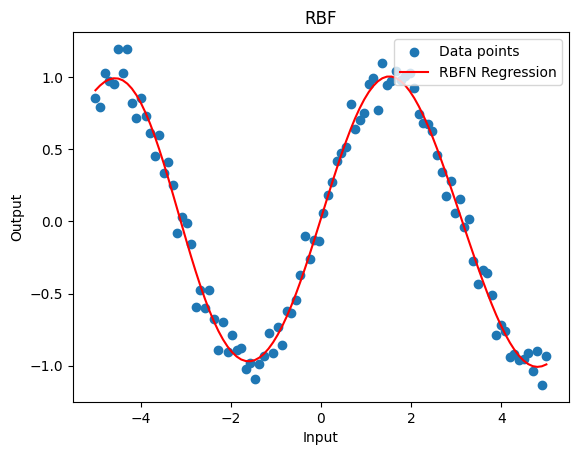

In [1]:
import numpy as np
import matplotlib.pyplot as plt

X = np.linspace(-5, 5, 100).reshape(-1, 1)
y = np.sin(X).ravel() + 0.1 * np.random.randn(100)

def rbf_kernel_function(x, c, s):
    rbf = np.exp(-0.5 * ((x - c) / s) ** 2)
    return rbf

def train():
    centers = np.linspace(-5, 5, 10)
    widths = 1.0
    rbf_kernel = rbf_kernel_function(X, centers, widths)
    phi = np.column_stack([rbf_kernel for c in centers])
    weights = np.linalg.lstsq(phi, y, rcond=None)[0]
    y_pred = phi.dot(weights)
    return y_pred

y_pred = train()
plt.scatter(X, y, label="Data points")
plt.plot(X, y_pred, color="red", label="RBFN Regression")
plt.xlabel("Input")
plt.ylabel("Output")
plt.title("RBF")
plt.legend()
plt.show()